# 1. Importing necessary libraries and dataset

In [1]:
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("census.csv")

# Success - Display the first record
display(data.head(n=5))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


# 2. Analysing the Output

In [2]:
smaller_50k=data.loc[data['income'] == '<=50K']
greater_50k=data.loc[data['income'] == '>50K']
n_records=data.shape[0]
n_smaller_50k=smaller_50k.shape[0]
n_greater_50k=greater_50k.shape[0]
greater_percent=float(n_greater_50k/n_records)*100

print("Total number of records: {}".format(n_records))
print("Individuals making more than $50,000: {}".format(n_greater_50k))
print("Individuals making at most $50,000: {}".format(n_smaller_50k))
print("Percentage of individuals making more than $50,000: {}%".format(greater_percent))

Total number of records: 45222
Individuals making more than $50,000: 11208
Individuals making at most $50,000: 34014
Percentage of individuals making more than $50,000: 24.78439697492371%


# 3. Dividing features and outputs.Also Visualizing the distribution

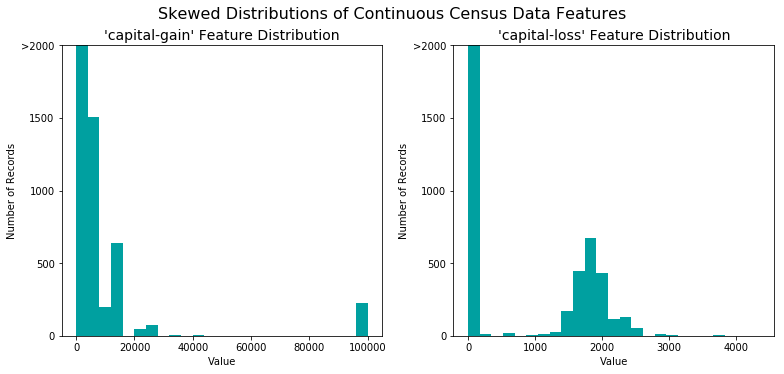

In [3]:
import visuals as vs
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)

# 4.As we have seen data is skewed, we should normalize it.

In [4]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_raw[numerical] = scaler.fit_transform(data[numerical])

# Show an example of a record with scaling applied
display(features_raw.head(n = 5))


,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.02174,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.00000,0.0,0.122449,United-States
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.00000,0.0,0.397959,United-States
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.00000,0.0,0.397959,United-States
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.00000,0.0,0.397959,Cuba


# 5.Preprocessing, turning categorical to numerical

In [5]:
income = income_raw.apply(lambda x: 1 if x == ">50K" else 0)

features=pd.get_dummies(features_raw)
features.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,0.301370,0.800000,0.02174,0.0,0.397959,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.452055,0.800000,0.00000,0.0,0.122449,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
2,0.287671,0.533333,0.00000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.493151,0.400000,0.00000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0.150685,0.800000,0.00000,0.0,0.397959,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


# 6. Splitting the data into Test and Train set

In [6]:
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                    income, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 36177 samples.
Testing set has 9045 samples.


# Evaluating the performance model


In [8]:
# TODO: Calculate accuracy

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import fbeta_score
#if we take all of them are not donor
income_pred=income.apply(lambda x:0)

accuracy=accuracy_score(income,income_pred)
print("Accuracy is:{}".format(accuracy))

Accuracy is:0.7521560302507629


# Accuracy from logistic regression


In [22]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
from sklearn.linear_model import LogisticRegression
import timeit
start = timeit.default_timer()
clf=LogisticRegression()
clf.fit(X_train,y_train)
Y_test_pred=clf.predict(X_test)
accuracy=accuracy_score(y_test,Y_test_pred)
end=timeit.default_timer()
time=end-start
print("Accuracy is: {}".format(accuracy))
print("Time taken: {} second".format(time))


Accuracy is: 0.8483139856274184
Time taken: 0.7087982086672469 second


# Accuracy from Decision Tree


In [23]:
from sklearn.tree import DecisionTreeClassifier
start=timeit.default_timer()
classifierDT = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifierDT.fit(X_train,y_train)
y_test_pred=clf.predict(X_test)
accuracy=accuracy_score(y_test,y_test_pred)
end=timeit.default_timer()
time=end-start
print("Accuracy is: {}".format(accuracy))
print("Time taken: {} second".format(time))


Accuracy is: 0.8483139856274184
Time taken: 0.7357427199217454 second


# Accuracy from Naive Bayes

# from sklearn.naive_bayes import GaussianNB
start=timeit.default_timer()
classifierNB=GaussianNB()
classifierNB.fit(X_train,y_train)
y_test_pred = classifierNB.predict(X_test)
accuracy=accuracy_score(y_test,y_test_pred)
end=timeit.default_timer()
time=end-start
print("Time taken: {} second".format(time))
print("Accuracy is: {}".format(accuracy))

# Accuracy from Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier
start=timeit.default_timer()
classifierRF = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifierRF.fit(X_train, y_train)
y_test_pred = classifierRF.predict(X_test)
accuracy=accuracy_score(y_test,y_test_pred)
end=timeit.default_timer()
time=end-start
print("Accuracy is: {}".format(accuracy))
print("Time taken: {} second".format(time))


Accuracy is: 0.8361525704809287
Time taken: 1.0033721357261243 second


# Accuracy from KNN

In [16]:
from sklearn.neighbors import KNeighborsClassifier
start=timeit.default_timer()
classifierknn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifierknn.fit(X_train, y_train)
y_test_pred = classifierknn.predict(X_test)
accuracy=accuracy_score(y_test,y_test_pred)
end=timeit.default_timer()
time=end-start
print("Accuracy is: {}".format(accuracy))
print("Time taken: {} second".format(time))


Accuracy is: 0.8201216141514649
Time taken: 39.73375611832685 second


# Winner is Decision Tree and Logistic regression
